<table>
<tr>
    <td width=10%><img src="./img/logo_lri.jpg"></td>
    <td width=30%><img src="./img/medi-chal_logo.png" height=15%></img></td>
</tr>

</table>

<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">
    Être ou ne pas être ?
</a></center>
<br/>
<center><a style="font-size: 22pt; font-weight: bold">
    Un problème de classification binaire sur des données médicales artificelles
<br/>

---

# Membres du groupe

**Minimum 2, Maximum 3**

<span style="color:red">
    Répondre ci-dessous
</span>

* PINEAU, FLORIAN
* MOUAOUED, WALID
* MESBAH, SLIMANE

# Présentation du challenge

## La question principale de ce challenge est : 

* Comment prédire la survie d'un·e patient·e compte tenu de son dossier médical ? 
    
* Plus précisément, vous devrez prédire la survie des patient·e·s pendant leur séjour à l'hôpital
 
Chaque jour, le personnel soignant collecte de nombreuses informations sur les patient·e·s en posant des questions et en utilisant des outils de mesure (stéthoscope, analyse de sang, capteurs, etc.). Ces données sont très utiles pour surveiller l'état de santé, diagnostiquer et choisir les traitements.

Elles peuvent également être utilisées pour l'analyse statistique prédictive.

## Données

L'ensemble de données contient des informations sur 80'000 patient·e·s, représentés par des variables (descripteurs) catégorielles, binaires et numériques. Ces variables sont, par exemple, l'âge, le sexe, l'origine ethnique, l'état matrimonial, ainsi que des données médicales telles que la tension artérielle ou le taux de glucose. Il y a un total de 342 variables.

La classe (étiquette ou label) à prédire est une variable binaire indiquant si la·le patient·e est décédé·e ou non pendant son séjour à l'hôpital. Heureusement, la plupart survivent :

![](img/tobe.png)

## Tâche

La tâche consiste à créer un modèle capable d'apprendre à partir des données et de faire des prédictions (apprentissage supervisé). Chaque instance (patient·e) possède une variable indiquant si elle·il est décédé·e ou non pendant son séjour à l'hôpital.

Références et crédit :

Isabelle Guyon, Kristin Bennett, Andrew Yale, Adrien Pavao, Thomas Gerspacher

## Instructions

Le but de ce TP est de travailler sur un challenge de prédiction de la mortalité.

Le lien vers le challenge :
https://codalab.lisn.upsaclay.fr/competitions/3739

* **Étape 1 :** S'enregistrer sur https://codalab.lisn.upsaclay.fr

* **Étape 2:** Téléchargez le jeu de données à partir de la [page](https://codalab.lisn.upsaclay.fr/competitions/3739#participate-get_starting_kit) "Participate > Files > Public Data".

* **Étape 3:** Parcourez ce notebook. Vous devrez lire, exécuter, **coder vos propres méthodes** et **répondre aux questions**. Utilisez la cellule ***code*** pour le codage et la cellule ***markdown*** pour répondre aux questions.

## Évaluation du projet

* **4 points** pour la partie compréhension et analyse exploratoire
    
* **4 points** pour un code propre et bien documenté

* **4 points** pour la qualité du modèle (sélection du modèle, sélection des hyperparamètres)

* **4 points** pour une bonne évaluation des performances du modèle

* **4 points** pour la qualité de la présentation orale 

* **1 point bonus** pour l'équipe gagnante du challenge

### FAQ

* Soumettre uniquement le notebook sur eCampus

* La partie texte (explications, résultats, problèmes, sans le code) ne doit pas dépasser 3 pages A4 11pt (< 1500 mots)

# Challenge

Module requis : `imblearn` (à installer avec `conda`)

`conda install -c conda-forge imbalanced-learn`

In [3]:
from datetime import datetime
from pathlib import Path

import imblearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import (
    decomposition,
    discriminant_analysis,
    ensemble,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
    preprocessing,
    svm,
    feature_selection,
    neighbors,

)

In [4]:
%reload_ext autoreload
%autoreload 2

%config InlineBackend.figure_format="retina"  # For high DPI display

# Set precision for pd and np (np: suppress also sci notation)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = "{:,.3g}".format

## 1. Compréhension du problème

### Expliquez brièvement la tâche avec vos mots

<span style="color:red">
    Répondre ci-dessous
</span>


ce modèle nous permettra de prédire si une personne hospitalisé a partir des données peut mourir ou non, et cela en utilisant l’apprentissage statistique supervisé


### Métrique utilisée

Pourquoi la métrique utilisée ici est la [`sklearn.metrics.balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) plutôt que simplement l'[`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) ?

<span style="color:red">
    Répondre ci-dessous
</span>

<span style="color:cyan">
-Tout d'abord, on va voir ce qu'est accuracy_score:

    La métrique accuracy_score fonctionne très bien si on a qu'une seule classe ou une base de données équilibré (il existe la fonction SMOTE dans imblearn pour rééquilibrer la base).

    Son fonctionnement est simple, il renvoie le pourcentage des prédictions corrections par exemple si on a 1000 prédictions, et prédit 975 correctement, alors l'accuracy sera de 97,5 %.

    Ce principe marche bien si on veut une idée de la précision des prédictions d'une seule classe. Dans une classification avec plusieurs classes, la métrique renvoie la précision du "subset".

    En mathématiques, cette métrique est le quotient de la somme des prédictions vraies (c'est-à-dire les prédictions qui ont été prédi être vraie et qui ont fini vraie ainsi que celles qui ont été prédit être fausse et qui ont fini fausse):
        
        (TP+TN)/ (TP+FN+TN+FP)
        TP= True Positive ( prediction = True; réalité = True)
        TN= True Negative ( prediction = False; réalité = False)
        FP= True Positive ( prediction = True; réalité = False)
        FN= False Negative ( prediction = False; réalité = True)

-Maintenant, passons à balanced_accuracy_score:
La métrique balanced_accuracy_score est utilisé principalement dans les cas où on a affaire à une base de données déséquilibrées (c'est-à-dire une base où une classe est dominante aux autres).

Cette métrique est la moyenne entre 2 autres métriques :

        -La sensibilité (aussi connue comme "true positive rate" ou "recall") qui est la proportion des prédictions correctes sur toutes les prédictions positives : TP / (TP + FN).

        -La spécificité (aussi connue comme "true negative rate") qui est la proportion des prédictions correctes sur toutes les prédictions négatives : TN / (TN + FP).
        
        Balanced_accuracy_score = (sensibilité + spécificité) / 2.

Après avoir vu ce que sont ces 2 métriques voyons avec un exemple concret le problème de accuracy que balanced_accuracy n'a pas.
Prenons un modèle où on a:

TP = 0; FP = 0; FN = 5; TN = 100;
Soit un modèle où on a aucune prédiction Vraie, 5 prédictions Fausses, mais au final Vraies et 100 prédictions Fausses et au final Vraies.

-Si on calcule avec accuracy_score:

        Acc = (0+100) / (0+0+5+100) = 0,95 soit 95%
Ceci a l'air bien, car le résultat est élevé, mais le problème est qu'on a aucnement pris en compte les prédictions Vraies car elles étaient nulles.

-Si on calcule avec balanced_accuracy:

        sensibilité = 0/(0+5) = 0
        spécificité = 100 / (0+100) = 1
        Acc = ( 0 + 1 ) / 2= 0,5 soit 50%
Dans ce cas, on voit que les prédictions Vraies ont bien été prises en compte.

Après avoir vu l'exemple, on voit que balanced_accuracy est plus précis lorsque la base est déséquilibré et surtout il prend bien tout en compte.

Dans la base de donnée qu'on va utiliser, il y a énormément de classes différentes et la base est totalement déséquilibrée. Donc il est normal d'utiliser la métrique balanced_accuracy_score au dépend d'utiliser accuracy_score.

            
</span>

## 2. Chargement des données

In [5]:
# DATA = Path("~/ownCloud/EDU/Courses/L2-ISD2/Project/public_data").expanduser()
DATA = Path("public_data")

PRED_PATH = Path("Submissions")

DROP_VARS = ["ADMITTIME", "DISCHTIME", "SUBJECT_ID", "HADM_ID"]

assert DATA.is_dir()

In [6]:
features = pd.read_csv(
    DATA / "mimic_synthetic_feat.name", header=None
).values.flatten()

labels = pd.read_csv(
    DATA / "mimic_synthetic_label.name", header=None
).values.flatten()

x_df = pd.read_csv(
    DATA / "mimic_synthetic_train.data",
    header=None,
    names=features,
    sep=" ",
)

# Remove variables that are not relevant
x_df.drop(columns=DROP_VARS, inplace=True)

ys = pd.Series(
    pd.read_csv(
        DATA / "mimic_synthetic_train.solution",
        header=None,
        names=labels,
        sep=" ",
    ).values.flatten()
)

In [7]:
x_df.head(3)

INSURANCE LANGUAGE      RELIGION MARITAL_STATUS ETHNICITY GENDER  AGE  \
0   Private     ENGL      CATHOLIC       DIVORCED     WHITE      F   21   
1   Private     ENGL  UNOBTAINABLE         SINGLE     WHITE      M   39   
2  Medicaid     SPAN      CATHOLIC        WIDOWED     OTHER      M   40   

   HR_MIN_DAY1  HR_MAX_DAY1  HR_MEAN_DAY1  ...  Eyeinfectn  Othereyedx  \
0         57.2          109          70.8  ...           0           0   
1         79.3          121          96.9  ...           0           0   
2          118          175           141  ...           0           0   

   Otitismedia  Dizziness  Othereardx  Othnervdx  Hrtvalvedx  Carditis  HTN  \
0            0          0           0          0           0         0    0   
1            0          0           0          0           0         0    0   
2            0          0           0          0           0         0    0   

   Htncomplicn  
0            0  
1            1  
2            0  

[3 rows x 337 columns]

C'est **l'ensemble d'entrainement**. Cela signifie que vous avez accès aux étiquettes et que vous pouvez l'utiliser comme vous le souhaitez pour préparer votre modèle.

Plus tard, vous ferez en sorte que votre modèle tire des prédictions de **l'ensemble de test** afin de les téléverser sur Codalab et d'obtenir un score sur des données non vues lors de l'entrainement des modèles.

In [8]:
# Load test set
x_test_df = pd.read_csv(
    DATA / "mimic_synthetic_test.data",
    header=None,
    names=features,
    sep=" ",
)

# Remove variables that are not relevant
x_test_df.drop(columns=DROP_VARS, inplace=True)

## 3. Analyse exploratoire

#### Types des variables

In [9]:
types = pd.read_csv(DATA / "mimic_synthetic_feat.type", header=None).set_index(
    features
)[0]

types.value_counts()

Numerical      226
Binary         107
Categorical      8
Name: 0, dtype: int64

#### Distribution de la variable cible

In [10]:
ys.describe()

count   8e+04
mean    0.035
std     0.184
min         0
25%         0
50%         0
75%         0
max         1
dtype: float64

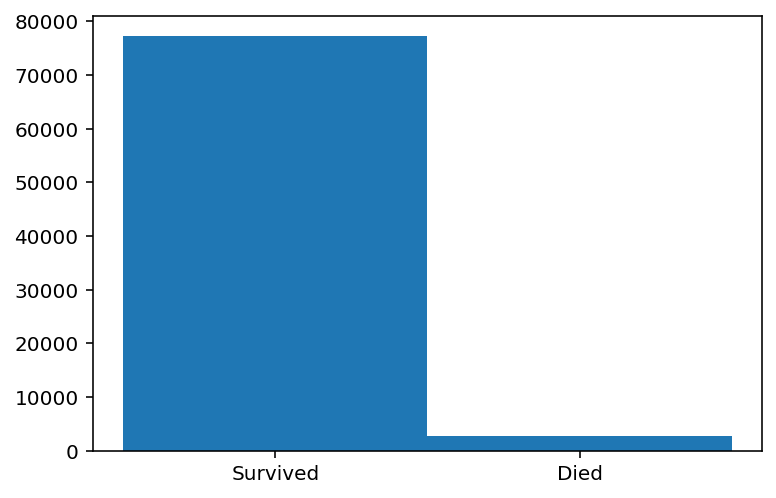

In [11]:
ys.hist(bins=2, grid=False, align="left")
plt.xticks([0, 0.5], ["Survived", "Died"])
# plt.savefig("img/tobe.png", dpi=300)
plt.show()

### Code : Produire les graphiques suivants

* Diagrammes à barres de certaines variables catégorielles (par exemple "LANGUAGE", "MARITAL_STATUS")

* Montrez la corrélation entre certaines variables et la variable cible y

* Un autre graphique ou toute analyse exploratoire à laquelle vous pouvez penser

Exemple

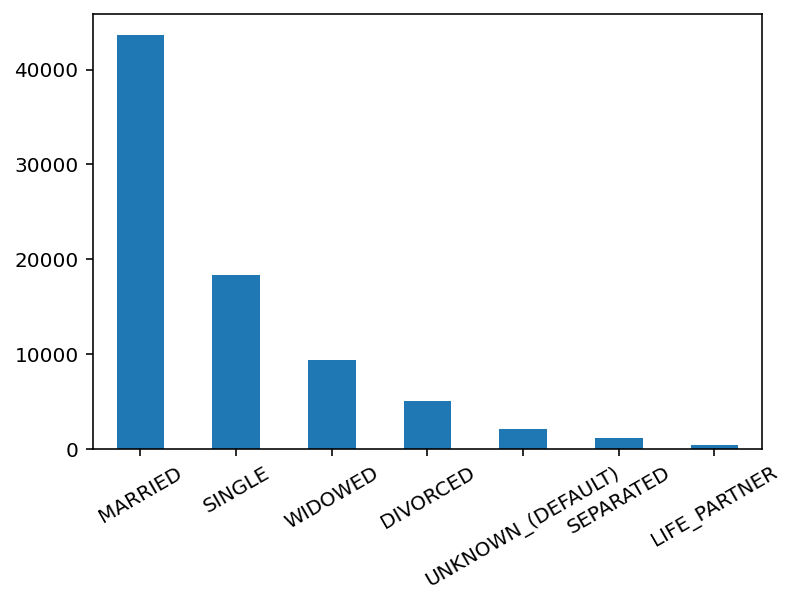

In [12]:
x_marital_cnts = x_df["MARITAL_STATUS"].value_counts()
x_marital_cnts.plot.bar(rot=30)
plt.show()

<span style="color:red">
    Répondre ci-dessous
</span>

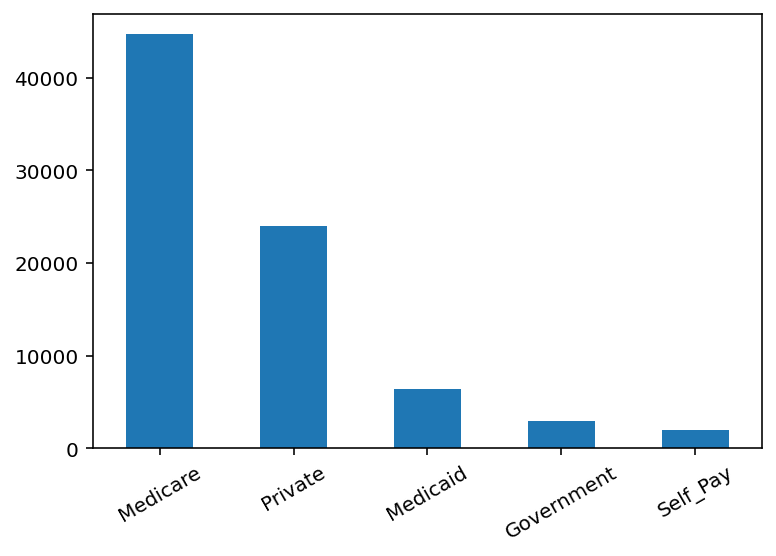

In [13]:
# TODO: Bar plot of another variable : INSURANCE

x_insurance_cnts = x_df["INSURANCE"].value_counts()
x_insurance_cnts.plot.bar(rot=30)
plt.show()

#### Corrélations

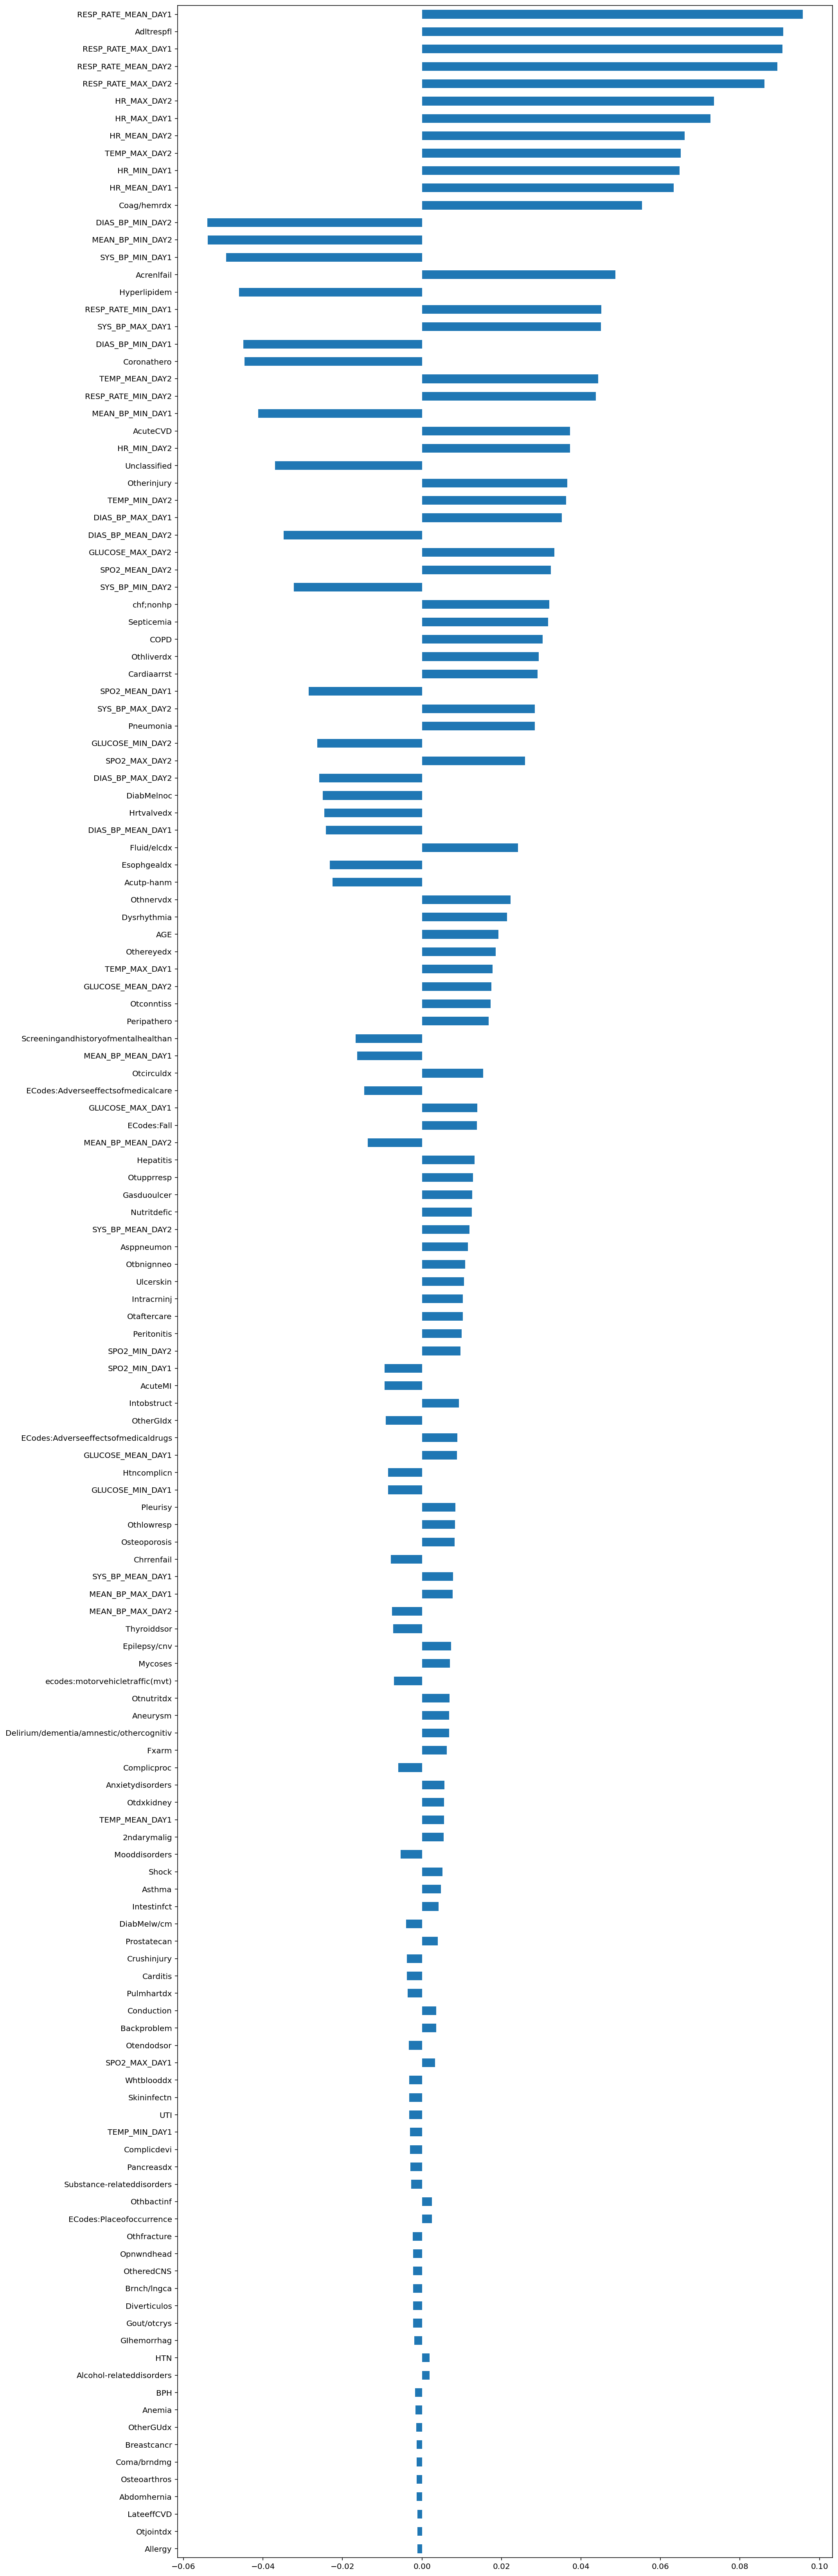

In [14]:
# TODO: Bar plot of the variables most correlated with y
s = x_df.corrwith(ys[:], axis=0)
s = s[abs(s)>0.001]
s = s.sort_values(key=lambda x: abs(x))
plt.figure(figsize=(15,60))
s.plot.barh(rot=0)
plt.show()

Astuce :

* Utilisez un graphique avec des barres horizontales `barh` (pour visualiser les valeurs positives et négatives)

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

ces patients parlent majoritairement anglais, ainsi qu’une minorité espagnole et russe

on a certaine features qui n'ont pas de correlation avec ys

#### Autres graphiques ou résultats d'une analyse exploratoire

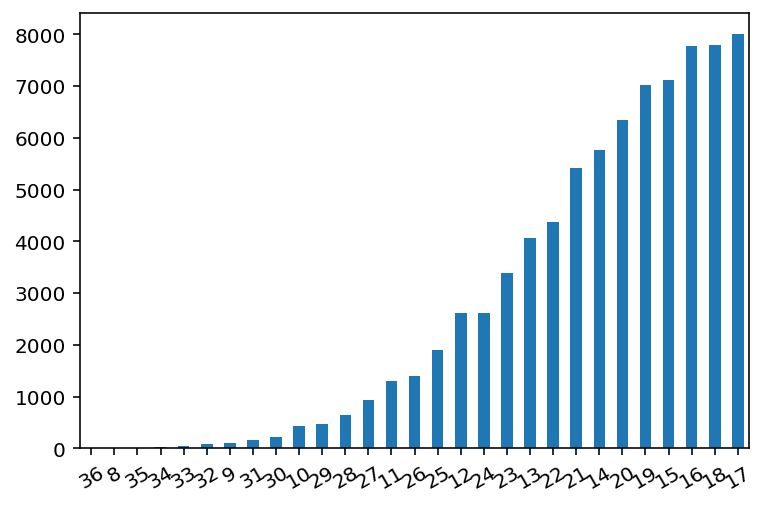

In [15]:
# TODO: Add graph
s = x_df.corrwith(ys, axis=0).idxmax()
x_df_copy = x_df.copy()
x_df_copy[s] = x_df_copy[s].round().astype(int)
x_highest_cnts = x_df_copy[s].value_counts().sort_values()
x_highest_cnts.plot.bar(rot=30)
plt.show()

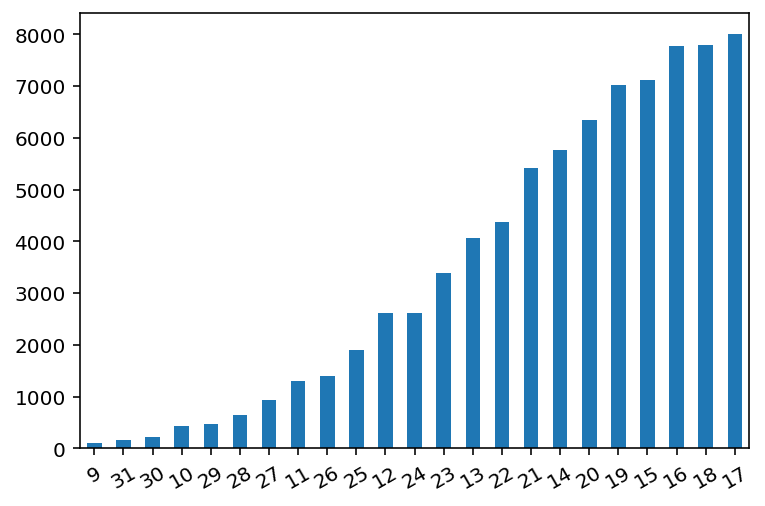

In [16]:
x_highest_cnts = x_df["RESP_RATE_MEAN_DAY1"].round().astype(int)
x_highest_cnts = x_highest_cnts.value_counts()
x_highest_cnts = x_highest_cnts[abs(x_highest_cnts)>100]
x_highest_cnts = x_highest_cnts.sort_values()
x_highest_cnts.plot.bar(rot=30)
plt.show()

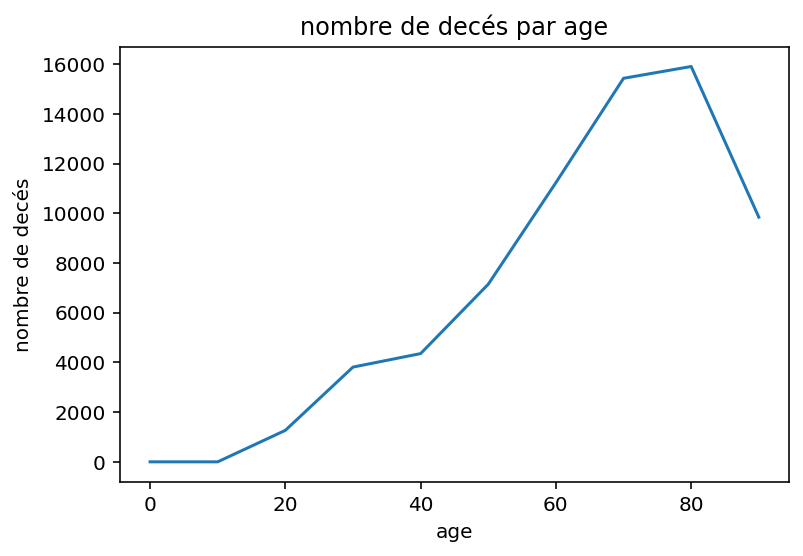

In [17]:
age = [i*10 for i in range(10)]
deathPerAge = []
for i in age: 
    agesdf = x_df['AGE'][x_df['AGE']<i]
    agesdf = agesdf[agesdf>i-10]
    indexes = agesdf.index
    deathPerAge.append(len(ys[indexes]==1))
plt.plot(age,deathPerAge)
plt.xlabel('age')
plt.ylabel('nombre de decés')
plt.title("nombre de decés par age")
plt.show()

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

on constate que l'âge des personnes décédées est majoritairement entre 40 ans et 80 ans, et cela nous aidera à prendre que les personne entre 40 et 80 ans pour le model 


## 4. Pre-traitement

### Code : Traitement du problème des valeurs manquantes (ou non définies, NAN)

La solution la plus simple est d'éliminer l'ensemble des colonnes où il y a des données manquantes, mais on perd de l'information. 

Vu le faible nombre d'instances concernées (maximum 6 : voir ci-dessous) il parait plus pertinent de supprimer les lignes (instances) plutôt que les colonnes entières (variables).

La solution que nous choisissons ici est une troisième, celle de remplacer les valeurs non définies par la valeur la plus probable de la variable. Comme ces valeurs manquantes concernent exclusivement des variables catégorielles et binaires, la valeur la plus probable est le *mode* (voir cours : `part-5-slides.pdf`).

In [18]:
print(x_df.shape, x_test_df.shape)

(79999, 337) (20001, 337)


In [19]:
x_nans = x_df.isna().sum()
x_miss = x_nans[x_nans > 0]
x_miss

LANGUAGE                              1
MARITAL_STATUS                        1
ICU                                   2
ECodes:Adverseeffectsofmedicalcare    6
Otnutritdx                            2
Othnervdx                             1
dtype: int64

In [20]:
x_test_nans = x_test_df.isna().sum()
x_test_miss = x_test_nans[x_test_nans > 0]
x_test_miss

LANGUAGE                              2
ECodes:Adverseeffectsofmedicalcare    3
dtype: int64

In [21]:
x_miss_rows = x_df.isna().any(axis="columns")

x_df.loc[x_miss_rows, x_miss.index]

LANGUAGE MARITAL_STATUS    ICU  ECodes:Adverseeffectsofmedicalcare  \
2251      ENGL        MARRIED   MICU                                 NaN   
9983      ENGL        MARRIED   MICU                                   0   
10549     ENGL        MARRIED   MICU                                   0   
10831     ENGL        MARRIED   MICU                                 NaN   
17012     ENGL        MARRIED   CSRU                                 NaN   
23088     ENGL        MARRIED    NaN                                   0   
32539     ENGL            NaN   CSRU                                   0   
42762     ENGL         SINGLE  TSICU                                 NaN   
53191      NaN        MARRIED   MICU                                   0   
53390     CAPE        MARRIED    NaN                                   0   
56772     ENGL        MARRIED   CSRU                                 NaN   
61852     ENGL        MARRIED   SICU                                 NaN   
71511     ENGL        MARRIED  TSICU                                   0   

       Otnutritdx  Othnervdx  
2251            0          0  
9983          NaN          0  
10549         NaN          0  
10831           1          0  
17012           0          1  
23088           0          0  
32539           0          0  
42762           0          0  
53191           0          0  
53390           0          0  
56772           0          0  
61852           0          0  
71511           0        NaN

#### Remplacement des NAN

In [22]:
na_cols = set(x_miss.index) | set(x_test_miss.index)

for col in na_cols:
    x_df[col].fillna(x_df[col].mode()[0], inplace=True)
    x_test_df[col].fillna(x_test_df[col].mode()[0], inplace=True)

In [23]:
print(
    x_df.isna().any().any(),
    x_test_df.isna().any().any(),
    sep="\n",
)

False
False


In [24]:
print(x_df.shape, x_test_df.shape)

(79999, 337) (20001, 337)


### Gestion des catégories rares

Simplifiez les données en regroupant par exemple les catégories rares.

In [25]:
def merge_rare_categories(dfs, col, keeps=None, keep_n=5):
    if keeps is None:
        keeps = x_df[col].value_counts()[:keep_n].index
        print(keeps)

    for df in dfs:
        df.loc[~df[col].isin(keeps), col] = "OTHER"


merge_rare_categories([x_df, x_test_df], col="RELIGION", keep_n=5)
print(x_test_df["RELIGION"].value_counts())

Index(['CATHOLIC', 'NOT_SPECIFIED', 'UNOBTAINABLE', 'PROTESTANT_QUAKER',
       'JEWISH'],
      dtype='object')
CATHOLIC             7517
NOT_SPECIFIED        3764
OTHER                2449
UNOBTAINABLE         2208
PROTESTANT_QUAKER    2208
JEWISH               1855
Name: RELIGION, dtype: int64


#### Code : Effectuez des regroupements de catégories rares pour d'autres variables si vous le jugez nécessaire

<span style="color:red">
    Répondre ci-dessous
</span>

In [63]:
# # TODO: Other application of merge_rare_categories

# n=0.001
# ### merge var
# s = x_df.corrwith(ys[:], axis=0)
# s = s[s<n]
# s = s[s>0]
# mergeVar=[]
# for x in s.index:
#     mergeVar.append(x)
# print(len(mergeVar))
# x_df['lessCorr']=x_df[mergeVar[0]]
# for var in mergeVar:
#         x_df['lessCorr']=x_df['lessCorr']+x_df[var]

# ## remove the merged var 
# try:
#     x_df.drop(columns=mergeVar, inplace=True)
# except Exception as e :
#     pass

# ## merge negative corr variables 
# s = s[s>-n]
# s = s[s<0]
# mergeVarNeg=[]
# for x in s.index:
#     mergeVarNeg.append(x)
# len(mergeVarNeg)
# x_df['lessCorrNeg']=x_df[mergeVarNeg[0]]
# for var in mergeVarNeg:
#         x_df['lessCorrNeg']=x_df['lessCorrNeg']+x_df[var]

# ## remove negative merged var
# try:
#     x_df.drop(columns=mergeVarNeg, inplace=True)
# except Exception as e :
#     pass
# ## remove  merged var from ys 
# try:
#     x_test_df.drop(columns=mergeVar, inplace=True)
# except Exception as e :
#     pass

# ## remove negative merged var from ys 
# try:
#     x_test_df.drop(columns=mergeVarNeg, inplace=True)
# except Exception as e :
#     pass

# ## add new merged var to data frame
# x_test_df['lessCorr']=x_df['lessCorr']
# x_test_df['lessCorrNeg']=x_df['lessCorrNeg']


### Transformation des données catégorielles en nombres entiers en utilisant deux types d'encodage

Les variables catégorielles sont présentées sous forme de chaines de caractères. La plupart des modèles ne pourront pas les prendre en entrée.

#### Encodage numérique simple

Deux des méthodes les plus simples sont `LabelEncoder` de Scikit-Learn et `factorize` de pandas. Elles consistent simplement à remplacer chaque nouvelle catégorie rencontrée par un entier, en commençant par 0. Ce n'est cependant peut-être pas la méthode la plus efficace, car elle présuppose une proximité entre les catégories codées avec des valeurs proches.

In [27]:
def label_encode(df, other_df, only_binary=False):

    char_cols = df.dtypes.pipe(lambda x: x[x == "object"]).index
    # print(char_cols)

    for col in char_cols:
        n_categories = len(x_df[col].unique())

        if not only_binary or n_categories == 2:
            codes, uniques = pd.factorize(df[col])
            df[col] = codes

            # Create conversion dic to convert values of test set as well
            cat2code = {k: v for v, k in enumerate(uniques)}
            other_df[col] = other_df[col].map(cat2code)

In [28]:
x_df.head(3)

INSURANCE LANGUAGE      RELIGION MARITAL_STATUS ETHNICITY GENDER  AGE  \
0   Private     ENGL      CATHOLIC       DIVORCED     WHITE      F   21   
1   Private     ENGL  UNOBTAINABLE         SINGLE     WHITE      M   39   
2  Medicaid     SPAN      CATHOLIC        WIDOWED     OTHER      M   40   

   HR_MIN_DAY1  HR_MAX_DAY1  HR_MEAN_DAY1  ...  Eyeinfectn  Othereyedx  \
0         57.2          109          70.8  ...           0           0   
1         79.3          121          96.9  ...           0           0   
2          118          175           141  ...           0           0   

   Otitismedia  Dizziness  Othereardx  Othnervdx  Hrtvalvedx  Carditis  HTN  \
0            0          0           0          0           0         0    0   
1            0          0           0          0           0         0    0   
2            0          0           0          0           0         0    0   

   Htncomplicn  
0            0  
1            1  
2            0  

[3 rows x 337 columns]

In [29]:
print(x_df.shape, ys.shape)

(79999, 337) (79999,)


In [30]:
x_fact_df = x_df.copy()
x_test_fact_df = x_test_df.copy()

label_encode(x_fact_df, x_test_fact_df)

In [31]:
x_fact_df.head(3)

INSURANCE  LANGUAGE  RELIGION  MARITAL_STATUS  ETHNICITY  GENDER  AGE  \
0          0         0         0               0          0       0   21   
1          0         0         1               1          0       1   39   
2          1         1         0               2          1       1   40   

   HR_MIN_DAY1  HR_MAX_DAY1  HR_MEAN_DAY1  ...  Eyeinfectn  Othereyedx  \
0         57.2          109          70.8  ...           0           0   
1         79.3          121          96.9  ...           0           0   
2          118          175           141  ...           0           0   

   Otitismedia  Dizziness  Othereardx  Othnervdx  Hrtvalvedx  Carditis  HTN  \
0            0          0           0          0           0         0    0   
1            0          0           0          0           0         0    0   
2            0          0           0          0           0         0    0   

   Htncomplicn  
0            0  
1            1  
2            0  

[3 rows x 337 columns]

In [32]:
x_test_fact_df.head(3)

INSURANCE  LANGUAGE  RELIGION  MARITAL_STATUS  ETHNICITY  GENDER  AGE  \
0          3         0         5               3          0       0   18   
1          2         0         2               1          4       0   56   
2          1         0         0               1          0       1   32   

   HR_MIN_DAY1  HR_MAX_DAY1  HR_MEAN_DAY1  ...  Eyeinfectn  Othereyedx  \
0         72.6          113          96.5  ...           0           0   
1         66.6          107          83.8  ...           0           0   
2         69.7          103          87.3  ...           0           0   

   Otitismedia  Dizziness  Othereardx  Othnervdx  Hrtvalvedx  Carditis  HTN  \
0            0          0           0          0           0         0    0   
1            0          0           0          0           0         0    1   
2            0          0           0          0           0         0    0   

   Htncomplicn  
0            0  
1            0  
2            0  

[3 rows x 337 columns]

#### Encodage 1-Hot

Un autre type d'encodage est souvent plus efficace, il a notamment l'avantage de ne pas ordonner les classes d'une manière particulière (pas forcément en adéquation avec la proximité de ces classes entre elles).

Une méthode de pandas permet de le réaliser en 1 ligne de code avec la fonction `get_dummies`.

In [33]:
codes, uniques = pd.factorize(x_df["MARITAL_STATUS"])
cat2code = {k: v for v, k in enumerate(uniques)}
cat2code

{'DIVORCED': 0,
 'SINGLE': 1,
 'WIDOWED': 2,
 'MARRIED': 3,
 'UNKNOWN_(DEFAULT)': 4,
 'SEPARATED': 5,
 'LIFE_PARTNER': 6}

Exemple d'encodage 1-hot avec la fonction `get_dummies` de pandas (pour MARITAL_STATUS) :

|    |   DIVORCED |   LIFE_PARTNER |   MARRIED |   SEPARATED |   SINGLE |   UNKNOWN_(DEFAULT) |   WIDOWED |
|---:|-----------:|---------------:|----------:|------------:|---------:|--------------------:|----------:|
|  0 |          1 |              0 |         0 |           0 |        0 |                   0 |         0 |
|  1 |          0 |              0 |         0 |           0 |        1 |                   0 |         0 |
|  2 |          0 |              0 |         0 |           0 |        0 |                   0 |         1 |
|  3 |          0 |              0 |         1 |           0 |        0 |                   0 |         0 |
|  4 |          0 |              0 |         1 |           0 |        0 |                   0 |         0 |

In [34]:
# Encode binary features on a single column (no need for 1-hot)
label_encode(x_df, x_test_df, only_binary=True)

x_all_oh_df = pd.get_dummies(pd.concat([x_df, x_test_df]))

x_oh_df = x_all_oh_df.iloc[: len(x_df)].copy()
x_test_oh_df = x_all_oh_df.iloc[len(x_df):].copy()

print(x_df.shape, x_test_df.shape)
print(x_oh_df.shape, x_test_oh_df.shape)

(79999, 337) (20001, 337)
(79999, 463) (20001, 463)


#### Suppression des variables à valeur unique (constantes)

In [35]:
const_cols = {col for col in x_oh_df if len(x_oh_df[col].unique()) == 1}
len(const_cols)

173

In [36]:
x_oh_df.drop(const_cols, axis="columns", inplace=True)
x_test_oh_df.drop(const_cols, axis="columns", inplace=True)

print(x_oh_df.shape, x_test_oh_df.shape)

(79999, 290) (20001, 290)


### Création de l'ensemble de validation

In [37]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
    x_oh_df, ys, test_size=0.3
)
# VARS: x_df, x_fact_df, x_oh_df

### Réduction de la dimension via l'ACP (PCA)

Testez l'ACP pour réduire le nombre de dimensions et observez si cela améliore le résultat.

Avant d'appliquer la ACP, il est conseillé de centrer-réduire les données (e.g., via `preprocessing.StandardScaler()`).

<span style="color:red">
    Répondre ci-dessous
</span>

In [38]:
x_nans = x_df.isna().sum()
x_miss = x_nans[x_nans > 0]
x_test_nans = x_test_df.isna().sum()
x_test_miss = x_test_nans[x_test_nans > 0]

na_cols = set(x_miss.index) | set(x_test_miss.index)

for col in na_cols:
    x_df[col].fillna(x_df[col].mode()[0], inplace=True)
    x_test_df[col].fillna(x_test_df[col].mode()[0], inplace=True)

In [39]:
x_all_oh_df = pd.get_dummies(pd.concat([x_df, x_test_df]))

x_all_oh_df.apply(lambda x: pd.factorize(x)[0])

x_oh_df = x_all_oh_df.iloc[: len(x_df)].copy()
x_test_oh_df = x_all_oh_df.iloc[len(x_df):].copy()

In [40]:
correlated_features = set()
correlation_matrix = x_oh_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


x_oh_df.drop(labels=correlated_features, axis=1, inplace=True)
x_test_oh_df.drop(labels=correlated_features, axis=1, inplace=True)

In [41]:
X = x_oh_df
Y = ys

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X,
    Y,
    test_size=0.2
)

In [61]:
x_train_pca = preprocessing.StandardScaler().fit_transform(x_train)
pca_mod = decomposition.PCA(n_components=0.90)
xpca_train = pca_mod.fit_transform(x_train)
xpca_test = pca_mod.transform(x_test)
# je vois pas pourquoi ca marche pas la pca ici 

Proposez un graphique qui représente les 2 premières dimensions de la PCA et commentez succinctement.

<span style="color:red">
    Répondre ci-dessous
</span>

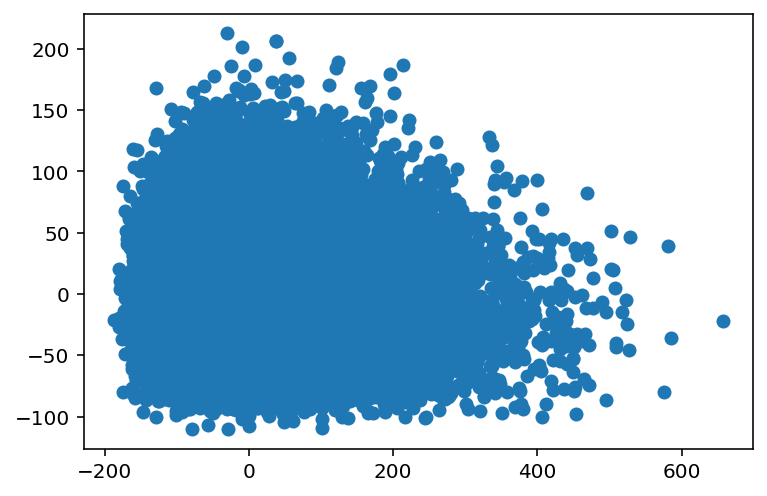

In [60]:
plt.scatter(xpca_train[:,0], xpca_train[:,1]) # a changer avec x_train_pca
plt.show()

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

on remarque que y a pas de correlation entre la premiere composante de la pca et la deuxieme 

## 5. Modèles de classification

Entrainez le modèle

### Baseline

`LogisticRegression` or `RandomForestClassifier`

In [44]:
SCORINGS = "balanced_accuracy"

<span style="color:red">
    Répondre ci-dessous
</span>

In [65]:
Classifier ={
    "logisticRegression": linear_model.LogisticRegression(max_iter=1000),
    "random forest classifier": ensemble.RandomForestClassifier(n_estimators=10),
    "nearestCentroid":  neighbors.NearestCentroid(metric = 'euclidean', shrink_threshold=0.05),
    "gausianNB": naive_bayes.GaussianNB(),
    # "svm": svm.SVC(),
}


## 6. Évaluations

In [66]:
accuracy_scores=np.zeros((118,2))

for index, nbc in enumerate(range(1, 119)):
    pipe = imblearn.pipeline.Pipeline(
    [
        ("scale", preprocessing.StandardScaler()),
        ("pca", decomposition.PCA(n_components = nbc)),
        ("resample", imblearn.over_sampling.SMOTE()),
        ('threshold', feature_selection.VarianceThreshold(threshold=0.01)),
        ("model", Classifier['logisticRegression'])
    ]
    )
    pipe.fit(x_train, y_train)
    pred_test_rbt = pipe.predict(x_test)
    resultat = metrics.balanced_accuracy_score(y_test, pred_test_rbt)
    accuracy_scores[index, 1]=( f"{resultat :.04f}")
    accuracy_scores[index, 0]=nbc

pd.DataFrame(accuracy_scores,columns=["nb_component","accuracy_score"]).sort_values(ascending = True, by=["accuracy_score"])

nb_component  accuracy_score
0               1            0.57
1               2           0.575
2               3           0.604
3               4           0.606
5               6           0.619
..            ...             ...
117           118           0.697
92             93           0.699
101           102           0.699
111           112           0.699
110           111           0.702

[118 rows x 2 columns]

In [67]:
pipe = imblearn.pipeline.Pipeline(
    [
        ("scale", preprocessing.StandardScaler()),
        ("pca", decomposition.PCA()),
        ("resample", imblearn.over_sampling.SMOTE()),
        ('threshold', feature_selection.VarianceThreshold(threshold=0.01)),
        ("model", Classifier['logisticRegression'])
    ]
)
pipe.fit(x_train, y_train)
pred_test_rbt = pipe.predict(x_test)
resultat = metrics.balanced_accuracy_score(y_test, pred_test_rbt)
print(f"Balanced accuracy score: {resultat:.3g}")

Balanced accuracy score: 0.734


### Code : Validation croisée

Le code ci-dessus utilise une méthode simple (*hold out*) pour mesurer le score de validation. Utilisez la validation croisée (pour obtenir une estimation plus fiable) combinée à l'exploration des hyperparamètres (pour améliorer les résultats).

Vous pouvez changer la valeur du nombre de validation croisée (CV) selon la valeur de l'erreur et le temps d'entrainement des modèles (compromis).

In [68]:
CV = 10
cv = 2
SCORINGS = "balanced_accuracy"

<span style="color:red">
    Répondre ci-dessous
</span>

In [69]:
#comparer les models : 
nbc_list = [10,100,150,170,177,180,183]
bacc_by_model=[]
for model in Classifier:
    bacc_by_nbc=[]
    for nbc in nbc_list:
        pipe = imblearn.pipeline.Pipeline(
        [
            ("scale", preprocessing.StandardScaler()),
            ("pca", decomposition.PCA(n_components = nbc)),
            ("resample", imblearn.over_sampling.SMOTE()),
            ('threshold', feature_selection.VarianceThreshold(threshold=0.01)),
            ("model",Classifier[model])
        ]
        )
        scores = model_selection.cross_val_score(pipe, X, Y, cv=2, scoring=SCORINGS)
        with np.printoptions(precision=2):
            bacc_by_nbc.append(scores)
    bacc_by_model.append(bacc_by_nbc)
bacc_by_model


[[array([0.636, 0.631]),
  array([0.693, 0.693]),
  array([0.7  , 0.703]),
  array([0.699, 0.71 ]),
  array([0.699, 0.713]),
  array([0.704, 0.712]),
  array([0.7  , 0.712])],
 [array([0.533, 0.527]),
  array([0.531, 0.531]),
  array([0.531, 0.528]),
  array([0.528, 0.522]),
  array([0.516, 0.526]),
  array([0.528, 0.528]),
  array([0.525, 0.524])],
 [array([0.629, 0.624]),
  array([0.683, 0.68 ]),
  array([0.681, 0.679]),
  array([0.684, 0.688]),
  array([0.687, 0.682]),
  array([0.686, 0.689]),
  array([0.687, 0.689])],
 [array([0.611, 0.603]),
  array([0.502, 0.497]),
  array([0.5  , 0.495]),
  array([0.499, 0.493]),
  array([0.5  , 0.493]),
  array([0.502, 0.491]),
  array([0.5  , 0.493])]]

In [70]:
# TODO: Cross-Validation

scores = model_selection.cross_val_score(pipe, x_oh_df, ys, cv=10, scoring=SCORINGS)

with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.2f}, with std dev: {scores.std():.2f}\n")

[0.49 0.51 0.5  0.51 0.49 0.49 0.48 0.52 0.5  0.48]

balanced_accuracy: 0.50, with std dev: 0.01



* **Pour 2 des modèles** (au moins 1 autre que les 2 proposés en baselines) :

    * Pour différentes valeurs d'un des hyperparamètres, donnez les `balanced_accuracy` moyennes de la validation croisée sous forme de Boxplots (ou de diagramme à bâtons avec une barre d'erreur) : voir l'exemple présenté dans le graphique ci-dessous. 
    
    * Explicitez succinctement quelles observations en tirer concernant la stabilité des prédictions.

![](img/boxplot-cv.png)

<span style="color:red">
    Répondre ci-dessous
</span>

In [71]:
bacc_by_model[0]

[array([0.636, 0.631]),
 array([0.693, 0.693]),
 array([0.7  , 0.703]),
 array([0.699, 0.71 ]),
 array([0.699, 0.713]),
 array([0.704, 0.712]),
 array([0.7  , 0.712])]

logisticRegression


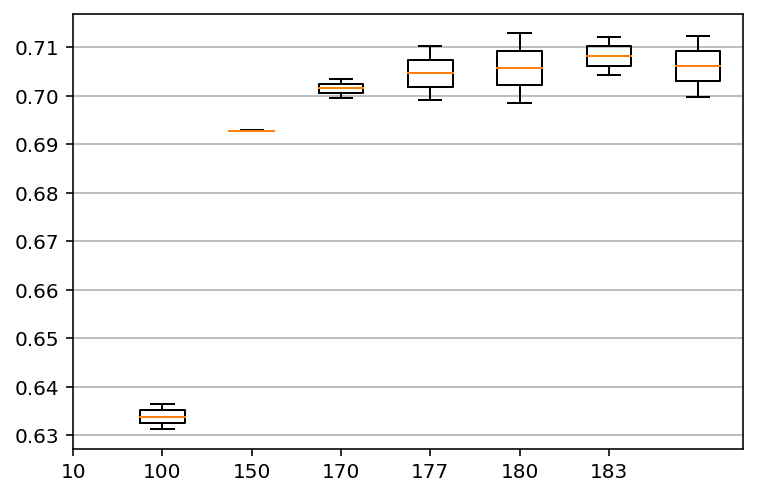

logisticRegression


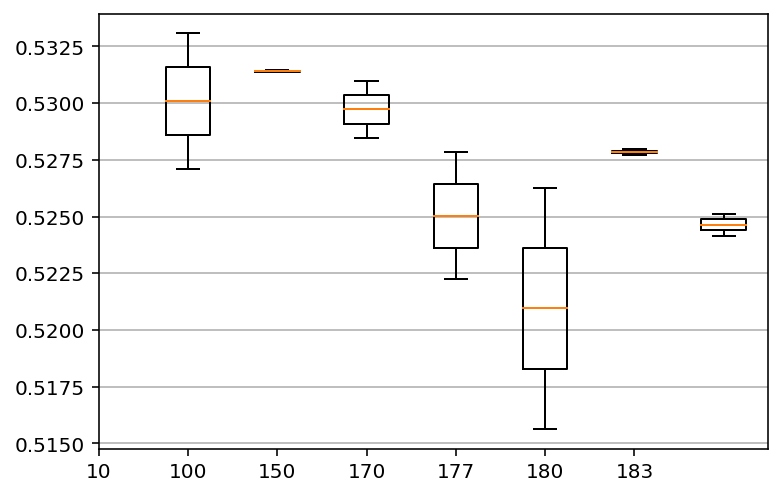

logisticRegression


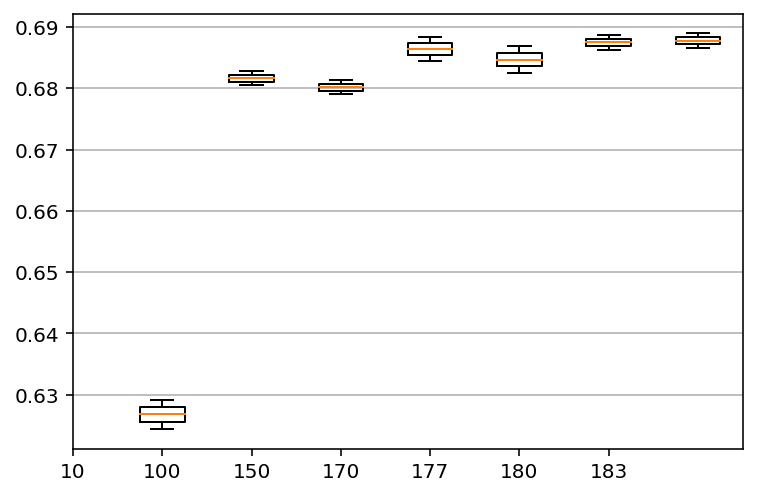

logisticRegression


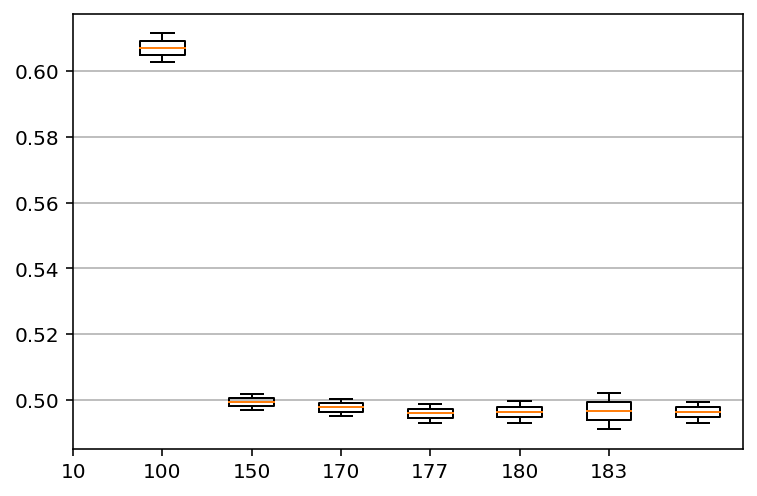

In [72]:
# TODO: Boxplot ou Barplot
for i  in range(len(Classifier)): # model names
    print(next(iter(Classifier))) 
    plt.boxplot(bacc_by_model[i])
    plt.xticks([i  for i in range(len(nbc_list))], [str(nbc_list[i]) for i in range(len(nbc_list))])
    plt.grid(axis="y")
    plt.show()

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

on remarque que la moyen est au tour de 70%, meme en changeant le threshold 

* **Pour chacun de ces 2 modèles, à partir des données de validation créées précédemment** (`x_valid`, `y_valid`) :

    * Mesurez l'aire sous la courbe ROC (AUC) à l'aide de la fonction de Scikit-Learn (`roc_auc_score`) et comparez les modèles avec leur combinaison respective d'hyperparamètres offrant le meilleur résultat.

<span style="color:red">
    Répondre ci-dessous
</span>

In [73]:
# TODO: ROC 
# for the one model
metrics.roc_auc_score(y_test, pred_test_rbt)

0.7343356874274332

In [74]:
roc_as=[]
for model in Classifier:
    pipe = imblearn.pipeline.Pipeline(
        [
            ("scale", preprocessing.StandardScaler()),
            ("pca", decomposition.PCA(n_components = nbc)),
            ("resample", imblearn.over_sampling.SMOTE()),
            ('threshold', feature_selection.VarianceThreshold(threshold=0.01)),
            ("model",Classifier[model])
        ]
        )

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    roc_as.append( metrics.roc_auc_score(y_test, y_pred))
    print(metrics.roc_auc_score(y_test, y_pred))
pd.DataFrame(roc_as,index=Classifier,columns=['roc_aus_score'])

0.6956028504777427
0.534093354211272
0.6838243909713567
0.4982099298032574


roc_aus_score
logisticRegression                0.696
random forest classifier          0.534
nearestCentroid                   0.684
gausianNB                         0.498

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

logistical Regression was chosen, 4% better than neighbors Nearest Centroid, 8% better and 10min faster than svc, which was third

* **Pour le modèle et sa combinaison d'hyperparamètres offrant le meilleur résultat** :

    * Réalisez la matrice de confusion et décrivez-la succinctement.

<span style="color:red">
    Répondre ci-dessous
</span>

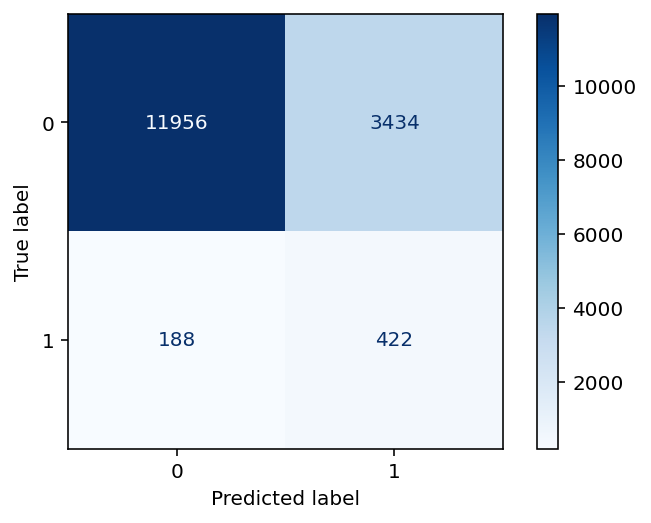

In [75]:

# TODO: Confusion Mtx
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, pred_test_rbt, cmap=plt.cm.Blues
)

<span style="color:red">
    Utiliser des cellules markdown pour ajouter des commentaires
</span>

on voit que le nombre de personnes prédites de vrais négatives sont de 12006, et 401 vrais positives, face à 3421 faux négatives et 172 faux positives, cette matrice nous montre que le modèle est en conflit dans la prédiction des vrais positives

### Code : Essayez d'améliorer votre score

* Data augmentation (optionnel)

Vu le déséquilibre entre les classes à prédire (survive, died), on peut espérer améliorer le score en les rééquilibrant. Une approche typique est la génération de données (voir cours : `part-6-slides.pdf`). Une des méthodes de génération est [SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE) (voir cours théorique), elle est notamment implémentée dans le module `imblearn`.

`imblearn` a été développé pour s'interfacer facilement avec `sklearn`.
Il propose notamment une version du `pipeline` qui permet l'intégration avec `sklearn`.

Ci-dessous voici un exemple de `pipeline` intégrant `imblearn` et `sklearn`.

<span style="color:red">
    Répondre ci-dessous
</span>

In [76]:
# # TODO: Data augmentation

## le code est dans la partie PCA

### Explication de ce que vous avez réalisé, conclusion et perspectives

* Commencez par donner votre meilleur résultat obtenu lors de vos soumissions

* Expliquez le chemin qui vous y a conduit

    * Ce que vous avez essayé :

        * Ce qui a fonctionné

        * Ce qui n'a pas fonctionné et comment vous l'avez solutionné

    * Quelle méthode avez-vous utilisée pour choisir les hyperparamètres ?

    * Comparer la durée d'entrainement des principaux modèles utilisés ?

* Qu'auriez-vous fait si vous aviez eu plus de temps ?

<span style="color:red">
    Répondre ci-dessous
</span>

Dans ce défi, nous avons atteint un résultat de 74 % dans le score de précision équilibré.
Après avoir téléchargé les données, nous avons commencé par la phase de prétraitement où nous avons supprimé certaines variables non corrélées et fusionné d'autres, en fusionnant certaines variables et les convertant a des données numériques, nous avons ensuite commencé à appliquer la technique PCA, une technique pour supprimer le bruit et réduire la dimensionnalité du jeu de données.

après la phase de prétraitement, et différentes analyses sur les données, nous avons entraîné le modèle, avec plusieur classifiers, ceux-ci cependant, avaient conduit soit à seulement 50% de BalAccScore ou avaient pris des heures sans résultat, c'est pourquoi nous avons commencé à filtrer les données, en appliquant une technique de suréchantillonnage, ainsi qu'en supprimant et en fusionnant davantage de features.

En ayant les données prêtes à être appliquées aux modèles, nous avons utilisé un pipeline avec différents hyperparamètres choisis par la technique de validation croisée, ces modèles ont ensuite été comparés les uns aux autres par leurs performances en utilisant la valeur ROC. où finalement logistic Regression a été choisi, 4% mieux que les voisins.Nearest Centroid ,  8% mieux et 10min plus rapide que svc, qui était en troisième position

Si nous n'avions pas le temps, nous devrions utiliser hadoop qui facilite l'utilisation de toute la capacité de stockage et de traitement des serveurs en cluster et l'exécution de processus distribués sur d'énormes quantités de données. Hadoop fournit les blocs de construction sur lesquels d'autres services et applications peuvent être construits.




### Question (optionnelle)

* Qu'est-ce que le suréchantillonnage ? 

* En quoi pourrait-il être utile dans ce problème ?

<span style="color:red">
    Répondre ci-dessous
</span>

C'est une solution à un problème d'apprentissage automatique souvent pratique où il y aura des différences significatives dans la rareté des différentes classes de données prédites. Par exemple, lors de la détection de la mortalité des patients, nous pouvons nous attendre à avoir des ensembles de données avec un grand nombre de faux résultats et un nombre relativement plus petit de vrais résultats, comme nous l'avons ici dans notre cas.

Le suréchantillonnage aléatoire consiste à sélectionner au hasard des exemples de la classe minoritaire, avec remplacement, et à les ajouter à l'ensemble de données d'apprentissage

Le suréchantillonnage grace a la methode de sklearn imblearn.over_sampling.SMOTE est capable d'améliorer le rapport de bruit et peut être utile pour éviter une compilation lente des modèles. ainsi que pour compenser un déséquilibre qui est soit déjà présent dans les données, soit susceptible de se développer si un échantillon purement aléatoire était prélevé

## 7. Enregistrer les prédictions

* Utilisez le code suivant pour faire des prédictions et pour les enregistrer sous forme de fichier ZIP
* Soumettez ce fichier ZIP sur [le site du challenge](https://competitions.codalab.org/competitions/30715#participate-submit_results)
("Participate > Submit/View Results > Submit")
* Faites de votre mieux pour être le ***premier sur le leaderboard !***

<span style="color:red">
    !! Ne pas oublier de modifier la commande de la prédiction selon les données et modèles choisis !!
</span>

* Données : `x_test_fact_df`, `x_test_oh_df`

* Modèles : `model`, `search` (e.g., pour le `GridSearchCV`)

In [77]:
# pipe = imblearn.pipeline.Pipeline(
#     [
#         ("scale", preprocessing.StandardScaler()),
#         ("pca", PCA()),
#         ("resample", imblearn.over_sampling.SMOTE()),
#         ('threshold', feature_selection.VarianceThreshold(threshold=0.01)),
#         ("model", model)
#     ]
# )
# pipe.fit(x_oh_df, ys)

# predictions = pipe.predict(x_test_oh_df)  # compute predictions
# # VARS: x_test_df, x_test_fact_df, x_test_oh_df, x_test_1hot_pcs
# # Models: model, search


# PRED_PATH.mkdir(parents=True, exist_ok=True)

# t_stamp = datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
# submission_fp = PRED_PATH / f"submission_{t_stamp}.zip"

# pred_fname = "mimic_synthetic_test.csv"
# compr_opts = dict(method="zip", archive_name=pred_fname)

# pd.Series(predictions).to_csv(
#     submission_fp, compression=compr_opts, index=False, header=False
# )

# print(f"The submission is ready: {submission_fp}")

---

# Remarque sur le jeu de données

Le jeu de données ne contient pas de données médicales réelles. Nous ne sommes pas autorisés à partager ces **données confidentielles** provenant de patient·e·s en soins intensifs. Pour éviter ce problème, les données ont été remplacées par des **données artificielles**.

Afin d'avoir des données crédibles, elles ont été générées à l'aide d'un réseau adverse génératif (**GAN**) Wasserstein.

Pour plus d'informations, voici une référence : <br />
[Privacy Preserving Synthetic Health Data](https://hal.inria.fr/hal-02160496/document) <br />
Andrew Yale, Saloni Dash, Ritik Dutta, Isabelle Guyon, Adrien Pavao, Kristin Bennett <br />

---